In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from pyforest import*

In [7]:
 lazy_imports()

['import seaborn as sns',
 'import pickle',
 'import sklearn',
 'import datetime as dt',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import plotly.graph_objs as go',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.model_selection import StratifiedKFold',
 'import statsmodels.api as sm',
 'from sklearn.linear_model import Lasso',
 'from openpyxl import load_workbook',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.linear_model import LogisticRegression',
 'import spacy',
 'import sys',
 'import torch',
 'import glob',
 'import keras',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import pandas as pd',
 'import pydot',
 'from sklearn.model_selection import cross_val_score',
 'from sklearn.ensemble import RandomForestClassifier',
 'from pathlib import Path',
 'from scipy import signal as sg',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import 

In [14]:
df=pd.read_csv('wisc_bc_data.csv')

<IPython.core.display.Javascript object>

In [18]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [19]:
#to check whether the cell is B or M

In [20]:
df['diagnosis']

0      B
1      B
2      B
3      B
4      B
      ..
564    B
565    B
566    M
567    B
568    M
Name: diagnosis, Length: 569, dtype: object

In [23]:
df.shape

(569, 32)

In [32]:
df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [35]:
df['diagnosis']=df['diagnosis'].astype('category')

In [38]:
df.dtypes #now we can see that the data type of diagnosis is changed successfully 

id                      int64
diagnosis            category
radius_mean           float64
texture_mean          float64
perimeter_mean        float64
area_mean             float64
smoothness_mean       float64
compactness_mean      float64
concavity_mean        float64
points_mean           float64
symmetry_mean         float64
dimension_mean        float64
radius_se             float64
texture_se            float64
perimeter_se          float64
area_se               float64
smoothness_se         float64
compactness_se        float64
concavity_se          float64
points_se             float64
symmetry_se           float64
dimension_se          float64
radius_worst          float64
texture_worst         float64
perimeter_worst       float64
area_worst            float64
smoothness_worst      float64
compactness_worst     float64
concavity_worst       float64
points_worst          float64
symmetry_worst        float64
dimension_worst       float64
dtype: object

In [41]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [45]:
df=df.drop(columns=['id'],axis=1) #this is because we have deleted the id and when we again check for the id we will not found

KeyError: "['id'] not found in axis"

In [46]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [50]:
x=df.drop(columns=['diagnosis'],axis=1)
y=df['diagnosis']

In [53]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [54]:
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: category
Categories (2, object): ['B', 'M']

In [55]:
#FOR HAVING THE VALUES APPROXIMATELY AN EQUALL DISTANCE AND FOR THE VALUES TO HAVE SAME STD WE USE THIS BELOW FUNCTION

In [57]:
from scipy.stats import zscore
xscaled=x.apply(zscore)

In [61]:
xscaled.head() #see we willl have small distance if we will find euchilian distance

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492


In [62]:
xscaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.576556e-16,-7.711075e-16,-1.186319e-16,-2.029230e-16,1.717041e-16,1.935573e-16,4.058460e-17,-5.619407e-17,1.638994e-16,-1.492265e-15,...,-9.209583e-17,1.560946e-18,-3.777490e-16,-1.779479e-16,-2.239958e-16,9.365678e-18,9.053488e-17,2.263372e-16,2.684828e-16,2.044840e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [63]:
scale=pd.DataFrame(xscaled)

<IPython.core.display.Javascript object>

In [65]:
scale.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492


In [66]:
# NOW WE ARE GOING TO BUILD OUR MODEL WE HAVE PREPARED OUR DATA TO BE PROPERLY RUNNED

In [68]:
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test=train_test_split(scale,y,test_size=0.30,random_state=1)

In [103]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
249,-0.604181,2.080480,-0.626051,-0.604056,-0.853294,-0.755046,-0.605769,-0.760127,-0.717843,-0.249159,...,-0.658355,1.987146,-0.660984,-0.627369,-0.507120,-0.436806,-0.436999,-0.661538,-0.734077,-0.111154
58,2.874993,0.211845,3.057588,3.145893,3.440117,3.455973,4.243589,3.927930,3.079138,0.846648,...,2.019222,-0.274754,2.193393,2.096165,1.632072,1.082296,1.478172,1.677876,0.519703,-0.213673
476,-0.589980,0.798266,-0.544495,-0.588983,-1.922199,0.056078,-0.117631,-0.493675,-2.222032,0.537611,...,-0.766038,0.493869,-0.592774,-0.689424,-1.945375,0.427072,0.091208,-0.082318,-1.148229,0.528899
529,-1.266502,-0.276839,-1.273149,-1.048305,-0.942962,-0.948730,-0.929185,-1.113014,-0.480532,0.187463,...,-1.060095,-0.172162,-1.076794,-0.879630,0.281926,-0.819126,-0.998357,-1.364398,0.252769,-0.287930
422,-0.845593,-1.445027,-0.869073,-0.776409,0.083955,-1.008427,-0.866033,-0.801139,0.067109,-0.247742,...,-0.886145,-1.527023,-0.923695,-0.773100,0.075898,-1.046800,-0.964439,-0.906686,-0.067552,-0.899167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.040531,0.758706,0.074182,-0.071356,0.529451,0.209585,0.721919,0.321673,0.417600,-0.422107,...,-0.202773,1.399280,-0.088202,-0.267700,0.246858,0.121089,0.725441,0.328800,-0.328014,-0.024151
144,0.128576,0.521345,0.224115,-0.028694,0.643316,1.562720,0.674211,1.003666,1.607807,0.913276,...,0.279729,1.226666,0.450921,0.028684,0.882478,2.608395,1.351518,2.367641,2.205430,2.413591
72,-1.444295,-0.090674,-1.313928,-1.167189,0.236249,1.759816,1.364734,0.004149,1.892581,3.491898,...,-1.285815,-0.370832,-1.150961,-1.025712,-0.450133,0.766771,0.905348,-0.001617,0.378956,1.194443
235,-0.695066,-0.725963,-0.678775,-0.666627,1.169940,-0.221940,-0.577646,-0.453952,0.151081,0.171869,...,-0.610726,-0.665579,-0.616305,-0.581488,0.886862,-0.677903,-0.591000,-0.250572,-0.156530,-0.205361


In [104]:
y_train

249    B
58     M
476    B
529    B
422    B
      ..
129    M
144    M
72     B
235    B
37     B
Name: diagnosis, Length: 398, dtype: category
Categories (2, object): ['B', 'M']

In [105]:
x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
421,0.276263,0.635371,0.217936,0.164705,-0.412780,-0.635462,-0.455360,-0.401848,-0.714193,-0.844553,...,0.379129,0.979143,0.310928,0.262662,0.286310,-0.308942,-0.004742,0.584607,-0.365223,-0.289039
47,3.295334,-0.425771,3.387110,3.854074,1.319387,2.500819,3.113641,3.672569,0.527128,-0.225060,...,3.491579,-0.341520,3.635028,4.137101,0.904396,2.159281,1.789052,2.451387,1.276824,0.232978
292,-0.101476,0.698202,-0.055155,-0.187680,1.682331,0.423736,0.623991,0.421496,0.081713,0.846648,...,0.025018,1.356941,0.129234,-0.129529,1.811799,0.368547,0.521546,0.802347,0.289978,0.520032
186,0.830091,-0.048787,0.882746,0.682900,1.262455,1.001757,1.283127,1.549724,1.166043,0.064131,...,0.687682,-0.128194,0.781544,0.542170,1.662757,0.885093,1.101567,2.127061,0.336894,0.369301
414,-0.678025,-1.226283,-0.730262,-0.647287,-1.297366,-1.154922,-0.833014,-0.549132,1.056515,-0.236401,...,-0.612797,-1.207849,-0.672005,-0.609790,-1.261097,-1.076762,-0.982717,-0.482778,0.323951,-0.945716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,-0.743348,1.079841,-0.718729,-0.714976,-0.266890,-0.042470,0.281240,-0.202977,-1.546608,0.411444,...,-0.784675,1.869899,-0.744086,-0.714386,-0.112597,-0.016317,0.435670,-0.275239,-1.276034,0.186983
487,2.312645,0.088510,2.505640,2.429179,2.579016,3.268353,4.238567,3.440423,2.717694,1.076300,...,2.512079,0.379878,2.964846,2.600686,1.653990,2.833589,3.303630,2.685877,1.867314,0.772728
11,-0.533178,-0.314072,-0.564266,-0.553431,-0.698865,-0.711647,-0.627112,-0.660562,0.578241,-0.073377,...,-0.554813,-0.074456,-0.615412,-0.556174,-0.467667,-0.480063,-0.373672,-0.494807,0.343365,-0.145512
268,-0.533178,0.733108,-0.567973,-0.535798,-1.027649,-0.991939,-0.899681,-0.936557,-0.977060,-0.430613,...,-0.434706,1.027997,-0.432526,-0.452984,-0.296707,-0.469885,-0.715735,-0.780458,0.322334,-0.106167


In [106]:
y_test

421    M
47     M
292    M
186    M
414    B
      ..
6      B
487    M
11     B
268    B
419    M
Name: diagnosis, Length: 171, dtype: category
Categories (2, object): ['B', 'M']

In [109]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [110]:
model.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [118]:
knn_predict=model.predict(x_test)

In [115]:
knn_predict

array(['M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M'], dtype=object)

In [116]:
model.score(x_test,y_test)

0.9649122807017544

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

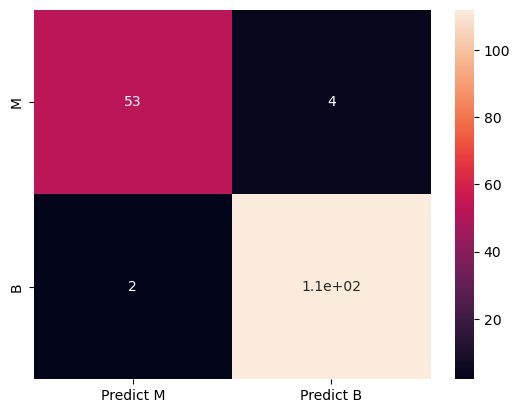

In [121]:
from sklearn.metrics import confusion_matrix
cm=metrics.confusion_matrix(y_test,knn_predict,labels=['M','B'])
data_cm=pd.DataFrame(cm,index=[i for i in['M','B']],
                     columns=[i for i in['Predict M','Predict B']])
sns.heatmap(data_cm,annot=True)

In [123]:
model.predict(x_train)

array(['B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B

In [124]:
model.score(x_train,y_train)

1.0

In [125]:
model.score(x_test,y_test)

0.9649122807017544

In [126]:
#NOW IF WE HAVE NO FIX NEIGHBORS AND WE HAVE TO CHECK WHICH NEIGHBOR IS DOING WELL

In [152]:
from sklearn.model_selection import cross_val_score
scores_1= []

for i in range(1,50):
    model_2=KNeighborsClassifier(n_neighbors=i)
    score_2=cross_val_score(model_2,scale,y,cv=10)
    scores_1.append(score_2.mean())


In [153]:
score_2

array([0.96491228, 0.94736842, 0.94736842, 0.92982456, 0.96491228,
       0.98245614, 0.92982456, 0.94736842, 0.94736842, 0.96428571])

In [154]:
len(scores_1)

49

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

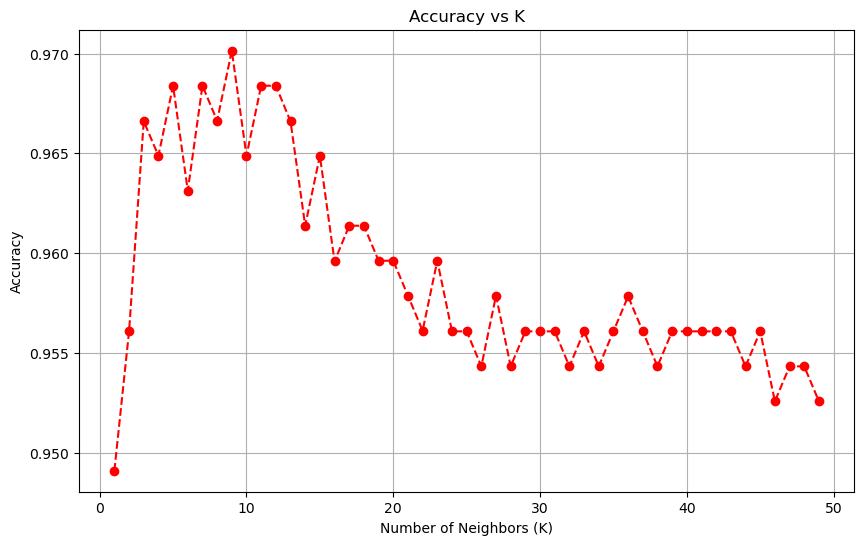

In [162]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,50), scores_1, marker='o', linestyle='dashed', color='red')
plt.title('Accuracy vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()